In [1]:
import pandas as pd
import tensorflow as tf

In [2]:
df=pd.read_csv("E:\\Program Stuff\\BharatIntern material\\GoogleStock Price Updated.csv")
df

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2013/01/02,18.003504,18.193193,17.931683,18.099348,18.099348,101550348
1,1,2013/01/03,18.141392,18.316566,18.036036,18.109859,18.109859,92635272
2,2,2013/01/04,18.251753,18.555305,18.210211,18.467718,18.467718,110429460
3,3,2013/01/07,18.404655,18.503002,18.282784,18.387136,18.387136,66161772
4,4,2013/01/08,18.406906,18.425926,18.128880,18.350851,18.350851,66976956
...,...,...,...,...,...,...,...,...
2531,2531,2023/01/23,97.949997,100.040001,97.500000,99.790001,99.790001,40005100
2532,2532,2023/01/24,98.099998,99.610001,97.199997,97.699997,97.699997,33078500
2533,2533,2023/01/25,95.570000,96.160004,93.760002,95.220001,95.220001,42330000
2534,2534,2023/01/26,96.500000,97.570000,95.379997,97.519997,97.519997,30114000


In [3]:
df.shape

(2536, 8)

In [4]:
df.pop("Unnamed: 0")

0          0
1          1
2          2
3          3
4          4
        ... 
2531    2531
2532    2532
2533    2533
2534    2534
2535    2535
Name: Unnamed: 0, Length: 2536, dtype: int64

In [5]:
df.shape

(2536, 7)

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013/01/02,18.003504,18.193193,17.931683,18.099348,18.099348,101550348
1,2013/01/03,18.141392,18.316566,18.036036,18.109859,18.109859,92635272
2,2013/01/04,18.251753,18.555305,18.210211,18.467718,18.467718,110429460
3,2013/01/07,18.404655,18.503002,18.282784,18.387136,18.387136,66161772
4,2013/01/08,18.406906,18.425926,18.128880,18.350851,18.350851,66976956


In [ ]:
df.tail()

In [ ]:
# For Close

In [7]:
df1=df.reset_index()['Close']
df1

0       18.099348
1       18.109859
2       18.467718
3       18.387136
4       18.350851
          ...    
2531    99.790001
2532    97.699997
2533    95.220001
2534    97.519997
2535    99.370003
Name: Close, Length: 2536, dtype: float64

In [8]:
df1.shape

(2536,)

In [9]:
df1.head()

0    18.099348
1    18.109859
2    18.467718
3    18.387136
4    18.350851
Name: Close, dtype: float64

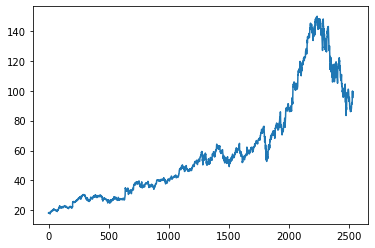

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
# LSTM are sensetive to the scale of the data, so here i have used MinMaxScaler

In [11]:
import numpy as np
df1

0       18.099348
1       18.109859
2       18.467718
3       18.387136
4       18.350851
          ...    
2531    99.790001
2532    97.699997
2533    95.220001
2534    97.519997
2535    99.370003
Name: Close, Length: 2536, dtype: float64

In [12]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler(feature_range=(0,1))
df1=ms.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
df1

array([[0.00385643],
       [0.00393591],
       [0.00664186],
       ...,
       [0.58700306],
       [0.60439444],
       [0.61838323]])

In [14]:
# Train Test split is done using cross validation or random seed

training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [15]:
training_size,test_size

(1648, 888)

In [16]:
# Pre processing to check time steps

import numpy

# Convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX,dataY = [],[]
    for i in range (len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]           # i=0,  0,1,2,3,.......
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX),numpy.array(dataY)

In [17]:
# Reshape into X=t,t+1,t+2,t+3 and Y=t+4

time_step=100
X_train,Y_train=create_dataset(train_data,time_step)
X_test,Y_test=create_dataset(test_data,time_step)

In [21]:
print(X_train.shape),print(Y_train.shape)

(1547, 100)
(1547,)


(None, None)

In [22]:
print(X_test.shape),print(Y_test.shape)

(787, 100)
(787,)


(None, None)

In [23]:
# Reshape input to be [samples, time steps, features] which is required for LSTM

X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [24]:
# Create the Stacked LSTM Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [25]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
25/25 [==============================] - 10s 196ms/step - loss: 0.0063 - val_loss: 0.0088
Epoch 2/100
25/25 [==============================] - 4s 154ms/step - loss: 3.8100e-04 - val_loss: 0.0031
Epoch 3/100
25/25 [==============================] - 4s 147ms/step - loss: 1.7701e-04 - val_loss: 0.0020
Epoch 4/100
25/25 [==============================] - 4s 177ms/step - loss: 1.5137e-04 - val_loss: 0.0021
Epoch 5/100
25/25 [==============================] - 4s 162ms/step - loss: 1.5641e-04 - val_loss: 0.0018
Epoch 6/100
25/25 [==============================] - 4s 149ms/step - loss: 1.6126e-04 - val_loss: 0.0037
Epoch 7/100
25/25 [==============================] - 4s 149ms/step - loss: 1.4567e-04 - val_loss: 0.0040
Epoch 8/100
25/25 [==============================] - 4s 156ms/step - loss: 1.4212e-04 - val_loss: 0.0034
Epoch 9/100
25/25 [==============================] - 4s 159ms/step - loss: 1.3992e-04 - val_loss: 0.0036
Epoch 10/100
25/25 [==============================] - 4s 1

25/25 [==============================] - 4s 152ms/step - loss: 5.7445e-05 - val_loss: 0.0035
Epoch 79/100
25/25 [==============================] - 4s 153ms/step - loss: 6.6982e-05 - val_loss: 0.0022
Epoch 80/100
25/25 [==============================] - 4s 150ms/step - loss: 6.4293e-05 - val_loss: 0.0014
Epoch 81/100
25/25 [==============================] - 4s 150ms/step - loss: 5.7560e-05 - val_loss: 0.0031
Epoch 82/100
25/25 [==============================] - 4s 152ms/step - loss: 5.6653e-05 - val_loss: 0.0010
Epoch 83/100
25/25 [==============================] - 4s 150ms/step - loss: 6.4904e-05 - val_loss: 0.0033
Epoch 84/100
25/25 [==============================] - 4s 151ms/step - loss: 6.1986e-05 - val_loss: 0.0021
Epoch 85/100
25/25 [==============================] - 4s 149ms/step - loss: 5.7301e-05 - val_loss: 0.0019
Epoch 86/100
25/25 [==============================] - 4s 148ms/step - loss: 5.0480e-05 - val_loss: 0.0023
Epoch 87/100
25/25 [==============================] - 4s 15

In [28]:
tf.__version__

'2.12.0'

In [29]:
# Lets do the prediction and check performance metrics

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

25/25 [==============================] - 1s 24ms/step


In [30]:
# Transformback to original form

train_predict=ms.inverse_transform(train_predict)
test_predict=ms.inverse_transform(test_predict)

In [31]:
# Calculate the RMSE performance metrics

import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

41.837983613595775

In [32]:
# Test Data RMSE

math.sqrt(mean_squared_error(Y_test,test_predict))

103.25228537055732

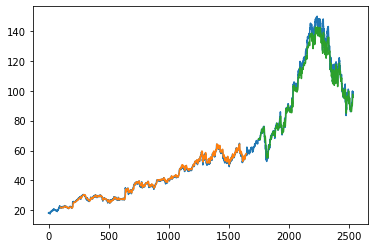

In [42]:
# Plotting
# Shift trainn predictions for plotting

look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# Shift test predictions for plotting

testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# Plot baseline and predictions

plt.plot(ms.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [35]:
len(test_data)

888

In [38]:
X_input = test_data[788:].reshape(1,-1)
X_input.shape

(1, 100)

In [43]:
temp_input = list(X_input)
temp_input = temp_input[0].tolist()

In [44]:
temp_input

[0.6746406362961096,
 0.6946029508867672,
 0.6865121647283531,
 0.7036767669576879,
 0.7052646717899506,
 0.6558125559255107,
 0.6609543677255012,
 0.645150892711876,
 0.6443191247964694,
 0.6463607002409361,
 0.631767032756371,
 0.6177026668825603,
 0.6242055482087114,
 0.613619458304078,
 0.6093094144194943,
 0.6042432336180539,
 0.6235250422904054,
 0.6036383010087495,
 0.5902544987427933,
 0.612863321387222,
 0.6355477750302009,
 0.6339598701979382,
 0.6338842391993881,
 0.6131657876918742,
 0.6069653726703753,
 0.6018235608703848,
 0.6046969042302579,
 0.6160391310517473,
 0.5971354196825983,
 0.622920109681101,
 0.6289692627054994,
 0.6203491749363312,
 0.622920109681101,
 0.6316914017578207,
 0.6422018606639037,
 0.6570224211441197,
 0.5848102206381506,
 0.5643186044367389,
 0.5950938442381316,
 0.5816344109736253,
 0.5510860064783345,
 0.5246208105615258,
 0.4978531483400648,
 0.5216718362031024,
 0.5361142416905669,
 0.5392144780460908,
 0.5272673186152969,
 0.5773243670890411

In [46]:
# Demonstrate prediction for next 10 days

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        # print (temp_input)
        X_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,X_input))
        X_input = X_input.reshape(1,-1)
        X_input = X_input.reshape((1, n_steps, 1))
        # Print (X_input)
        yhat = model.predict(X_input,verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        # Print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        X_input = X_input.reshape((1,n_steps,1))
        yhat = model.predict(X_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
print(lst_output)

0 day input [0.62896926 0.62034917 0.62292011 0.6316914  0.64220186 0.65702242
 0.58481022 0.5643186  0.59509384 0.58163441 0.55108601 0.52462081
 0.49785315 0.52167184 0.53611424 0.53921448 0.52726732 0.57732437
 0.59600124 0.59063254 0.61135105 0.61445123 0.61074611 0.60371393
 0.5898764  0.60084059 0.61150225 0.60394077 0.5932791  0.58677622
 0.6306328  0.6306328  0.62647402 0.619215   0.60031129 0.58488585
 0.5755852  0.56893111 0.57256059 0.59010324 0.58586882 0.55403498
 0.5494981  0.5357362  0.54012182 0.54435629 0.53059439 0.54170978
 0.52779662 0.51743737 0.53581178 0.5341483  0.54087801 0.53301406
 0.51879844 0.52741852 0.53256033 0.53558494 0.55902553 0.55607656
 0.56356247 0.55728642 0.55600098 0.57059465 0.60817518 0.62155904
 0.60575551 0.58700306 0.60439444 0.61838323 0.58651876 0.58225548
 0.57349873 0.56488103 0.55808145 0.55343825 0.55072057 0.54939842
 0.54880315 0.54827398 0.5472734  0.54546171 0.54272258 0.53914541
 0.53497231 0.53052562 0.52613407 0.5220682  0.518

8 day output [[0.47707817]]
9 day input [0.58163441 0.55108601 0.52462081 0.49785315 0.52167184 0.53611424
 0.53921448 0.52726732 0.57732437 0.59600124 0.59063254 0.61135105
 0.61445123 0.61074611 0.60371393 0.5898764  0.60084059 0.61150225
 0.60394077 0.5932791  0.58677622 0.6306328  0.6306328  0.62647402
 0.619215   0.60031129 0.58488585 0.5755852  0.56893111 0.57256059
 0.59010324 0.58586882 0.55403498 0.5494981  0.5357362  0.54012182
 0.54435629 0.53059439 0.54170978 0.52779662 0.51743737 0.53581178
 0.5341483  0.54087801 0.53301406 0.51879844 0.52741852 0.53256033
 0.53558494 0.55902553 0.55607656 0.56356247 0.55728642 0.55600098
 0.57059465 0.60817518 0.62155904 0.60575551 0.58700306 0.60439444
 0.61838323 0.58651876 0.58225548 0.57349873 0.56488103 0.55808145
 0.55343825 0.55072057 0.54939842 0.54880315 0.54827398 0.5472734
 0.54546171 0.54272258 0.53914541 0.53497231 0.53052562 0.52613407
 0.5220682  0.51850164 0.51549494 0.51300687 0.51092041 0.50907969
 0.50732356 0.50551713 

17 day output [[0.4641291]]
18 day input [0.59600124 0.59063254 0.61135105 0.61445123 0.61074611 0.60371393
 0.5898764  0.60084059 0.61150225 0.60394077 0.5932791  0.58677622
 0.6306328  0.6306328  0.62647402 0.619215   0.60031129 0.58488585
 0.5755852  0.56893111 0.57256059 0.59010324 0.58586882 0.55403498
 0.5494981  0.5357362  0.54012182 0.54435629 0.53059439 0.54170978
 0.52779662 0.51743737 0.53581178 0.5341483  0.54087801 0.53301406
 0.51879844 0.52741852 0.53256033 0.53558494 0.55902553 0.55607656
 0.56356247 0.55728642 0.55600098 0.57059465 0.60817518 0.62155904
 0.60575551 0.58700306 0.60439444 0.61838323 0.58651876 0.58225548
 0.57349873 0.56488103 0.55808145 0.55343825 0.55072057 0.54939842
 0.54880315 0.54827398 0.5472734  0.54546171 0.54272258 0.53914541
 0.53497231 0.53052562 0.52613407 0.5220682  0.51850164 0.51549494
 0.51300687 0.51092041 0.50907969 0.50732356 0.50551713 0.50356972
 0.50144291 0.4991478  0.4967334  0.49427098 0.49183741 0.48950005
 0.48730654 0.4852796

27 day output [[0.45358577]]
28 day input [0.5932791  0.58677622 0.6306328  0.6306328  0.62647402 0.619215
 0.60031129 0.58488585 0.5755852  0.56893111 0.57256059 0.59010324
 0.58586882 0.55403498 0.5494981  0.5357362  0.54012182 0.54435629
 0.53059439 0.54170978 0.52779662 0.51743737 0.53581178 0.5341483
 0.54087801 0.53301406 0.51879844 0.52741852 0.53256033 0.53558494
 0.55902553 0.55607656 0.56356247 0.55728642 0.55600098 0.57059465
 0.60817518 0.62155904 0.60575551 0.58700306 0.60439444 0.61838323
 0.58651876 0.58225548 0.57349873 0.56488103 0.55808145 0.55343825
 0.55072057 0.54939842 0.54880315 0.54827398 0.5472734  0.54546171
 0.54272258 0.53914541 0.53497231 0.53052562 0.52613407 0.5220682
 0.51850164 0.51549494 0.51300687 0.51092041 0.50907969 0.50732356
 0.50551713 0.50356972 0.50144291 0.4991478  0.4967334  0.49427098
 0.49183741 0.48950005 0.48730654 0.48527965 0.48341835 0.48170203
 0.4800978  0.47856814 0.47707817 0.47560123 0.47412154 0.47263402
 0.47114444 0.46966448 0

In [48]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [49]:
import matplotlib.pyplot as plt

In [50]:
len(df1)

2536

In [51]:
df3=df1.tolist()
df3.extend(lst_output)

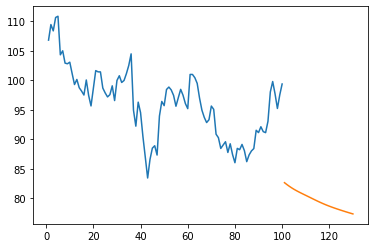

In [52]:
plt.plot(day_new,ms.inverse_transform(df1[2436:]))
plt.plot(day_pred,ms.inverse_transform(lst_output))

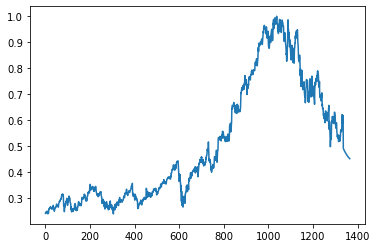

In [56]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [57]:
df3=ms.inverse_transform(df3).tolist()

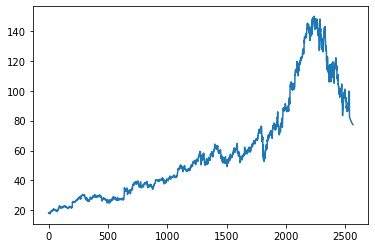

In [58]:
plt.plot(df3)